## 1. About Riiid

1. Riid - это компания по искусственному интеллекту, которая предоставляет своим клиентам решения для обучения на основе искусственного интеллекта
2. С самого веб-сайта компании: Riiid означает Устранение барьеров в "Неэффективности", "Неравенстве", "Неудобстве".

## 2. About Data

1. Riiid предлагает <b>Santa</b> - мобильное приложение для подготовки к тестированию по английскому языку для международного общения, известное как TOEIC.
2. Используя данные, полученные из приложения Santa в результате взаимодействия с пользователем, Riiid предоставляет пользователям персонализированные учебные планы в режиме реального времени, чтобы оптимизировать их учебный потенциал.

## 3. About TOEIC Test

1. TOEIC - это тест продолжительностью 120 минут, он состоит из 2 разделов.
2. TOEIC имеет формат вопросов с множественным выбором, в котором мы должны отмечать ответы в листе ответов.
3. Он состоит из раздела чтения и раздела прослушивания.
4. Каждый раздел сам по себе состоит из нескольких частей, которые оценивают различные способности студента к обучению.

Вот пример Примерного вопроса, Взятого из Части 1 раздела Прослушивания. В части 1 произносятся четыре утверждения об изображении (не печатаются), и из этих четырех утверждений мы должны выбрать одно утверждение, которое наилучшим образом описывает изображение.

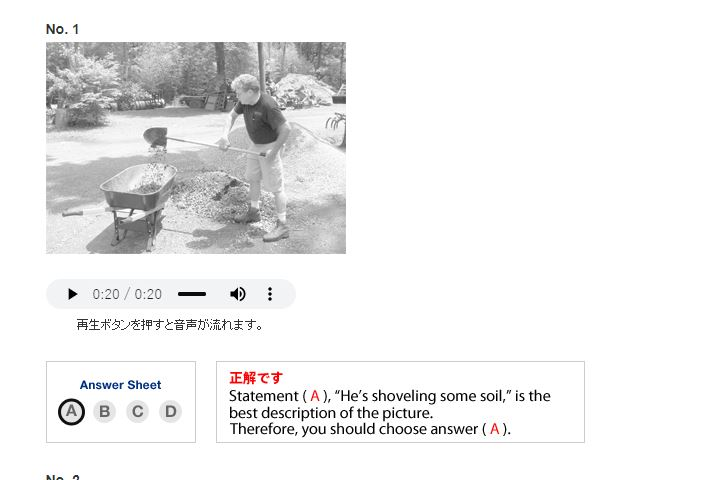

В приведенном выше вопросе 4 утверждения были произнесены только один раз, и из них было верно одно, которое было отмечено

Давайте посмотрим еще один пример вопроса из части 5 раздела "Чтение" , который включает в себя выбор наилучшего ответа из 4 предложенных вариантов для надлежащего завершения предложения.


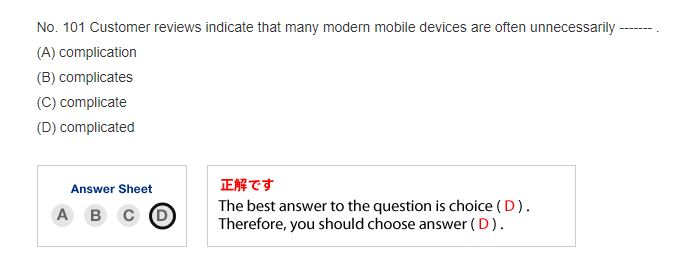

Вы можете прочитать больше о TOEIC здесь, но ключевой вывод заключается в том, что ответы на ответ будут состоять из 4 вариантов, мы увидим это сейчас, по мере продвижения в EDA.

## 4. Интеллектуальное обучение и отслеживание знаний

### 1. Intelligent Tutoring Systems(ITS)

1. Интеллектуальное обучение - это компьютерная система, целью которой является обеспечение немедленной и индивидуальной обратной связи с учащимися.
2. ITS широко используются в формальных и образовательных учреждениях.
3. Вот некоторые примеры ITS: Репетитор практической алгебры (PAT), используемый для преподавания алгебры студентам, разработанный Центром передовых когнитивных репетиторов Питтсбурга при Университете Карнеги-Меллон, Репетитор SQL, разработанный ICTG в Университете Кентерберри, Новая Зеландия, SmartTutor, разработанный для поддержки потребностей взрослых в непрерывном образовании.

### 2. Knowledge Tracing

1. Алгоритм отслеживания знаний используется во многих интеллектуальных приложениях для обучения.
2. Байесовский алгоритм отслеживания знаний используется во многих интеллектуальных системах обучения для моделирования овладения знаниями каждым обучаемым .
3. Байесовская трассировка знаний предполагает, что знания учащихся представлены в виде набора двоичных переменных, по одной для каждого навыка, где каждый навык осваивается или нет (Более неформально для нашей задачи Чтение и аудирование - это два навыка, которые будут оцениваться, и, следовательно, они могут быть представлены двоичной переменной) Наблюдения в байесовской трассировке знаний также являются двоичный (для нашего примера это будет зависеть от того, получил ли студент правильный или неправильный ответ)

## Предварительный Анализ Данных

Давайте теперь погрузимся в EDA, после некоторых знаний о предметной области и понимания конкуренции и проблем, которые мы собираемся решить

In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib_venn as venn
%matplotlib inline
import seaborn as sns
import plotly.express as px
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
matplotlib.style.use('seaborn-pastel')

* <b>row_id: (int64)</b> - ID code for the row.
* <b>timestamp: (int64)</b> - время в миллисекундах между этим пользовательским взаимодействием и завершением первого события от этого пользователя.
* <b>user_id: (int32)</b>  - ID code for the user.
* <b>content_id: (int16)</b> -  код для взаимодействия с пользователем
* <b>content_type_id: (int8)</b>  0 - если событием был вопрос, заданный пользователю, 1 - если событием был пользователь, просматривающий лекцию.
* <b>task_container_id: (int16)</b> - ID код для пакета вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидит пояснения к любому из них. Все эти три будут иметь общий идентификатор task_container_id.
* <b>user_answer: (int8)</b> - ответ пользователя на вопрос, если таковой имеется. Считайте -1 как null, для лекций.
* <b>answered_correctly: (int8)</b> - if the user responded correctly. Read -1 as null, for lectures.
* <b>prior_question_elapsed_time: (float32)</b> - Среднее время в миллисекундах, которое потребовалось пользователю, чтобы ответить на каждый вопрос в предыдущем наборе вопросов, игнорируя любые промежуточные лекции. Равно нулю для первого пакета вопросов пользователя или лекции. Обратите внимание, что время - это среднее время, затраченное пользователем на решение каждого вопроса в предыдущем пакете.
* <b>prior_question_had_explanation: (bool)</b> - Независимо от того, видел ли пользователь объяснение и правильный ответ (ы) после ответа на предыдущий пакет вопросов, игнорируя любые промежуточные лекции. Значение является общим для всего пакета вопросов и равно нулю для первого пакета вопросов пользователя или лекции. Как правило, первые несколько вопросов, которые видит пользователь, были частью встроенного диагностического теста, где они не получили никакой обратной связи.

In [2]:
student = pd.read_parquet('E:/Архив/MIPT/HW6/train.parquet', engine='pyarrow')

In [106]:
student.profile_report()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 bool   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  float32
dtypes: bool(1), float32(2), int16(2), int32(1), int64(2), int8(2)
memory usage: 3.3 GB


нужно преобразовать тип данных content_type_id из bool в int8.

In [4]:
student['content_type_id'] = student.content_type_id.astype('int8')

In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  float32
dtypes: float32(2), int16(2), int32(1), int64(2), int8(3)
memory usage: 3.3 GB


В столбцах "prior_question_elapsed_time" и "prior_question_had_explanation" появляются некоторые нулевые объекты, давайте проверим их количество!

In [6]:
print("Количество нулевых объектов в столбце 'prior_question_elapsed_time' равно : ",student.prior_question_elapsed_time.isna().sum())
print("Количество нулевых объектов в столбце 'prior_question_had_explanation' равно : ",student.prior_question_had_explanation.isna().sum())

Количество нулевых объектов в столбце 'prior_question_elapsed_time' равно :  2351538
Количество нулевых объектов в столбце 'prior_question_had_explanation' равно :  392506


In [97]:
student.describe()

row_id     timestamp       user_id    content_id  \
count  1.000000e+07  1.000000e+07  1.000000e+07  1.000000e+07   
mean   5.000000e+06  7.546528e+09  1.079943e+08  5.209509e+03   
std    2.886751e+06  1.141381e+10  6.311024e+07  3.867783e+03   
min    0.000000e+00  0.000000e+00  1.150000e+02  0.000000e+00   
25%    2.500000e+06  5.109600e+08  5.398177e+07  2.059000e+03   
50%    5.000000e+06  2.612310e+09  1.067638e+08  5.016000e+03   
75%    7.499999e+06  9.751909e+09  1.630735e+08  7.402000e+03   
max    9.999999e+06  8.470816e+10  2.167479e+08  3.273600e+04   

       content_type_id  task_container_id   user_answer  answered_correctly  \
count     1.000000e+07       1.000000e+07  1.000000e+07        1.000000e+07   
mean      1.953960e-02       8.776194e+02  1.376462e+00        6.262029e-01   
std       1.384117e-01       1.334407e+03  1.193603e+00        5.226395e-01   
min       0.000000e+00       0.000000e+00 -1.000000e+00       -1.000000e+00   
25%       0.000000e+00       1.020000e+02  0.000000e+00        0.000000e+00   
50%       0.000000e+00       3.710000e+02  1.000000e+00        1.000000e+00   
75%       0.000000e+00       1.055000e+03  3.000000e+00        1.000000e+00   
max       1.000000e+00       9.999000e+03  3.000000e+00        1.000000e+00   

       prior_question_elapsed_time  
count                 9.765216e+06  
mean                  2.547559e+04  
std                   1.995033e+04  
min                   0.000000e+00  
25%                   1.600000e+04  
50%                   2.100000e+04  
75%                   2.966600e+04  
max                   3.000000e+05

Давайте заглянем в train dataframe

In [7]:
student.head()

row_id  timestamp  user_id  content_id  content_type_id  task_container_id  \
0       0          0      115        5692                0                  1   
1       1      56943      115        5716                0                  2   
2       2     118363      115         128                0                  0   
3       3     131167      115        7860                0                  3   
4       4     137965      115        7922                0                  4   

   user_answer  answered_correctly  prior_question_elapsed_time  \
0            3                   1                          NaN   
1            2                   1                      37000.0   
2            0                   1                      55000.0   
3            0                   1                      19000.0   
4            1                   1                      11000.0   

   prior_question_had_explanation  
0                             NaN  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0

Теперь мы оценим количество уникальных пользователей в нашем фрейме данных train, помните, что пользователь может иметь многократное взаимодействие, так как он может отвечать на несколько вопросов, а также просматривать видеолекции в промежутках.

In [99]:
unique_users_list = student.user_id.unique().tolist()
print("Количество уникальных пользователей :" , len(unique_users_list))
print("{:>20}: {:>8}".format('Процент уникальных пользователей ',(len(unique_users_list)/(student.shape[0]/100)) ))

Количество уникальных пользователей : 39491
Процент уникальных пользователей :  0.39491


In [100]:
answer = student.copy()

In [101]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 762.9+ MB


In [102]:
del answer['user_answer']

In [103]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   answered_correctly              int64  
 7   prior_question_elapsed_time     float64
 8   prior_question_had_explanation  object 
dtypes: float64(1), int64(7), object(1)
memory usage: 686.6+ MB


In [224]:
lst = student.answered_correctly.value_counts()
print(f'Правильно ответили на: {lst[1]} тестов')
print(f'Ответили не верно на: {lst[0]} тестов')
print(f'Просмотрено лекций: {lst[-1]}')

Правильно ответили на: 65244627 тестов
Ответили не верно на: 34026673 тестов
Просмотрено лекций: 1959032


In [225]:
total = lst[1] + lst[0] + lst[-1]
print(f'Правильно ответили на {lst[1]/(student.shape[0]/100)} % тестов')
print(f'Не правильно ответили на {lst[0]/(student.shape[0]/100)} % тестов')
print(f'Не отвечали  {lst[-1]/(student.shape[0]/100)} %')

Правильно ответили на 64.45165763162764 % тестов
Не правильно ответили на 33.61312002809593 % тестов
Не отвечали  1.9352223402764304 %


<AxesSubplot:xlabel='answered_correctly', ylabel='count'>

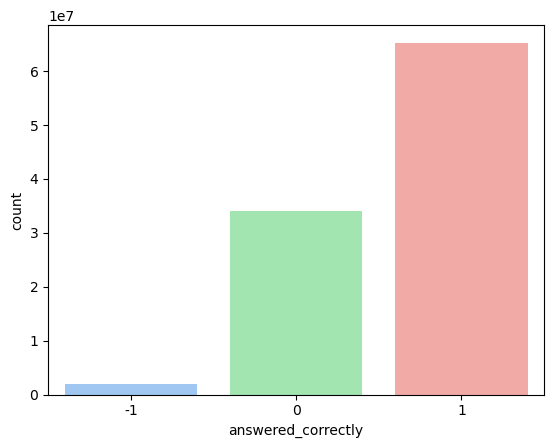

In [227]:
sns.countplot(student['answered_correctly'])

Теперь мы оценим количество уникальных пользователей в нашем фрейме данных train, помните, что пользователь может взаимодействовать с несколькими пользователями, так как он может отвечать на несколько вопросов, а также просматривать видеолекции в промежутках.

In [228]:
unique_users_list = student.user_id.unique().tolist()
print("Количество уникальных пользователей :" , len(unique_users_list))
print("{:>20}: {:>8}".format('Процент уникальных пользователей',(len(unique_users_list)/(student.shape[0])) *100))

Количество уникальных пользователей : 393656
Процент уникальных пользователей: 0.3888715884088971


Давайте теперь построим график панели для распределения пользователей в соответствии с content_id и поймем, сколько пользователей смотрят лекцию и сколько отвечали на вопрос, давайте посмотрим, какой идентификатор типа контента доминирует

In [232]:
users_content_group = student.groupby(['content_type_id'])['user_id'].count().reset_index()
users_content_group.columns = ['content_type_id' , 'count']
fig = px.bar(
    users_content_group, 
    x='content_type_id', 
    y="count", 
    color = "content_type_id",
    orientation='v', 
    title='Количество пользователей, основанное на Content_type_id', 
    width=700,
    height=500
)

fig.show()

Мы видим, что количество Пользователей, которые отвечали на вопросы, доминирует над количеством пользователей, которые смотрели лекции.

Теперь давайте посмотрим % возраста уникального контента в нашем наборе данных

In [233]:
unique_content_list = student.content_id.unique().tolist()
print("Number of Unique Conents are (column 'content_id') :" , len(unique_content_list))
#print(%.3f"Percentage of Unique Questions are : " , (len(unique_questions_list))/(df_train.shape[0]))
# Let's check our memory usage
print("{:>20}: {:>8}".format("Percentage of Unique Content are (column 'content_id') ",len(unique_content_list)/(student.shape[0]) *100))

Number of Unique Conents are (column 'content_id') : 13782
Percentage of Unique Content are (column 'content_id') : 0.01361449649300765


Давайте теперь построим график топ-10 контента, и их распределения на основе частоты появления.

In [234]:
student_content = student.groupby('content_id')['user_id'].count().reset_index().sort_values(by ='user_id', ascending=False)[:5]
student_content

content_id  user_id
6116        6116   213605
6173        6173   202106
4120        4120   199372
175          175   195861
7876        7876   190170

In [235]:
#df_top_content = student.groupby('content_id')['user_id'].count().reset_index().sort_values(by ='user_id', ascending=False)[:10]
student_content['content_id'] = student_content['content_id'].astype('category')
student_content.columns = ['content_id' , 'count']
fig = px.bar(
    df_top_content, 
    x='content_id', 
    y="count", 
    orientation='v', 
    title='Top 5 Content Ids, имеющих наибольшее количество пользователей', 
    width=800,
    height=800,
)

fig.show()

Давайте теперь посмотрим, какой процент пользователей правильно ответил на вопросы, а также их распределение

In [236]:
correct_answer_stu = student.loc[student['answered_correctly'] == 1 ].shape[0]
print("Number of Correct Answer Students  are :" ,correct_answer_stu)
print("{:>20}: {:>8.4}".format('Percentage of Correct Answers',(correct_answer_stu)/(student.shape[0]) *100))

Number of Correct Answer Students  are : 65244627
Percentage of Correct Answers:    64.45


In [237]:
student_ques_only = student.loc[student['content_type_id'] == 0]
student_correct_ans = student_ques_only.groupby('answered_correctly')['user_id'].count().reset_index().sort_values(by ='user_id', ascending=False)
student_correct_ans
student_correct_ans.columns = ['answered_correctly' , 'count']
fig = px.bar(
    student_correct_ans, 
    x='answered_correctly', 
    y="count", 
    orientation='v', 
    title='User Counts Based on Correctly answer question', 
    width=500,
    height=500
)

fig.show()

Теперь давайте построим диаграмму Венна, чтобы показать, как связаны пользователи, просматривающие видео, и пользователи, отвечающие на вопросы

In [ ]:
student_questions_user = student.loc[student['content_type_id'] == 0 ]
student_lectures_user = student.loc[student['content_type_id'] == 1 ]
student_questions_user_id_set = set(student_questions_user['user_id'])
student_lectures_user_id_set = set(student_lectures_user['user_id'])
venn.venn2([student_questions_user_id_set,student_lectures_user_id_set],set_labels=('Question','Lectures'))

Мы можем видеть, что набор пользователей, которые смотрят лекции, является подмножеством набора пользователей, отвечающих на вопросы, что означает, что могут быть пользователи, которые только отвечают на вопросы и не предпочитают смотреть лекции, если бы все пользователи смотрели лекции, а также отвечали на вопросы, мы бы получили почти перекрывающийся набор!

#### Lets see Sample Statistics of an student who has user_id = 115

In [185]:
student_sample = student.loc[student['user_id'] == 115]
unique_questions_list = student_sample.content_id.unique().tolist()
print("Количество уникальных вопросов, заданных студену 115, составляет:" , len(unique_questions_list))
print("{:>20}: {:>8}".format('Процент уникальных вопросов, просмотренных студентом 115, составляет',len(unique_questions_list)/(student_sample.shape[0]) *100))
correct_answer_stu = student_sample.loc[student_sample['answered_correctly'] == 1 ].shape[0]
print("Number of Correct Answer by 115   are :" ,correct_answer_stu)
print("{:>20}: {:>8.4}".format('Percentage of Correct Answers by 115 are',(correct_answer_stu)/(student_sample.shape[0]) *100))

Количество уникальных вопросов, заданных студену 115, составляет: 46
Процент уникальных вопросов, просмотренных студентом 115, составляет:    100.0
Number of Correct Answer by 115   are : 32
Percentage of Correct Answers by 115 are:    69.57


### 6. EDA of Questions.csv

In [206]:
question = pd.read_csv('E:/Архив/MIPT/HW6/questions.csv')
question.head()

question_id  bundle_id  correct_answer  part            tags
0            0          0               0     1   51 131 162 38
1            1          1               1     1       131 36 81
2            2          2               0     1  131 101 162 92
3            3          3               0     1  131 149 162 29
4            4          4               3     1    131 5 162 38

In [188]:
print("Количество уникальных вопросов " , question.shape[0])

Количество уникальных вопросов  13523


В соответствии с описанием данных, если вы заметили "example_test_rows.csv", в нем четко сказано: "В скрытом наборе тестов появятся некоторые вопросы, которые НЕ были представлены в наборе train, имитируя задачу быстрой адаптации к моделированию вновь введенных вопросов", Однако их метаданные все еще находятся у нас в questions.csv, это может пригодиться для набора проверки!

In [190]:
train_ques_set = set(student['content_id'])
all_ques_set = set(question['question_id'])

not_in_train_ques = list(all_ques_set.difference(train_ques_set))
print('{}:{}'.format("The Number of Questions Not in Train Set Are" , len(not_in_train_ques)))

The Number of Questions Not in Train Set Are:23


Давайте посмотрим, скольким частям может принадлежать вопрос!

In [191]:
question.head()

question_id  bundle_id  correct_answer  part            tags
0            0          0               0     1   51 131 162 38
1            1          1               1     1       131 36 81
2            2          2               0     1  131 101 162 92
3            3          3               0     1  131 149 162 29
4            4          4               3     1    131 5 162 38

<AxesSubplot:title={'center':'Количество вопросов по частям'}, xlabel='part'>

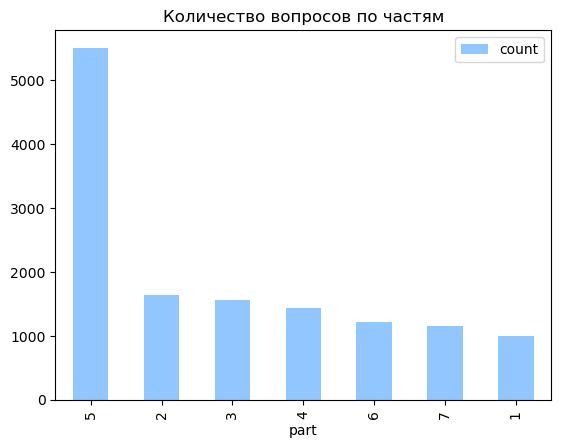

In [193]:
student_ques_bundle = question.groupby('part')['question_id'].count().reset_index().sort_values(by ='question_id', ascending=False)
student_ques_bundle.columns = ['part' ,'count']
student_ques_bundle.plot.bar(x = 'part' , y = 'count', title = "Количество вопросов по частям")

In [194]:
print("Number of Unique Questions are " , question.shape[0])

Number of Unique Questions are  13523


Мы видим, что в части 5 наибольшее количество вопросов, в частях 2, 3 и 4 почти одинаковое количество вопросов, в части 1 наименьшее количество вопросов

Давайте посмотрим Теги вопросов сейчас!

Составим список уникальных тегов

In [195]:
tag_list = []
for i in question.index:
    temp = str(question['tags'][i]).split(" ")
    for tag in temp:
        if tag not in tag_list:
            tag_list.append(tag)

In [197]:
tag_list[:10]

['51', '131', '162', '38', '36', '81', '101', '92', '149', '29']

Давайте теперь посмотрим, какие теги имеют минимальное и максимальное количество появлений, а также попробуем составить график нескольких лучших тегов с наибольшей частотой появления!

In [198]:
tag_dict = {key:0 for key in tag_list}
for i in question.index:
    temp = str(question['tags'][i]).split(" ")
    for tag in temp:
        tag_dict[tag] +=1

In [200]:
# отсортируем dict 
sorted_tag_dict = {k: v for k, v in sorted(tag_dict.items(), key=lambda item: item[1] , reverse=True)}

In [202]:
# Теперь давайте получим минимальное и максимальный появление тегов

print("Maximum Appearance of a Tag is :" , max(sorted_tag_dict.values()))
print("Minimum Appearance of a Tag is :" , min(sorted_tag_dict.values()))
print("Tag Having Maximum Appearance is :" , list(sorted_tag_dict.keys())[0] )
print("Tag Having Minimum Appearance is :" , list(sorted_tag_dict.keys())[-1] )

<b>Maximum Appearance of a Tag is : 2269
Minimum Appearance of a Tag is : 1
Tag Having Maximum Appearance is : 92
Tag Having Minimum Appearance is : 86


Давайте возьмем Топ-10 тегов и построим график их появления

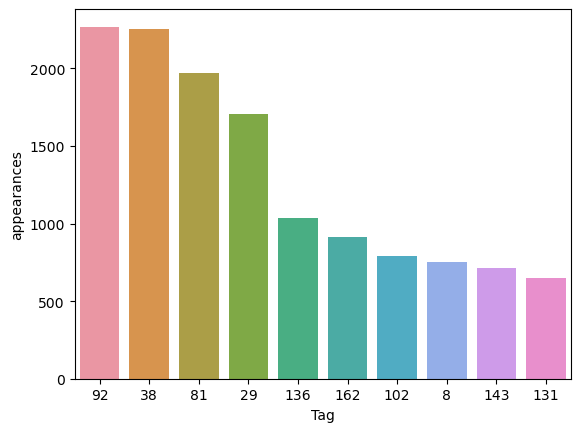

In [203]:
import itertools
top_10_tags = dict(itertools.islice(sorted_tag_dict.items(), 10))
top_10 = pd.DataFrame(list(top_10_tags.items()) , columns=['Tag' , 'appearances']) 
ax = sns.barplot(x="Tag", y="appearances", data=top_10)

Давайте посмотрим на внешний вид тегов в соответствии с правильным и неправильным ответом, давайте проанализируем топ-10 тегов, мы должны предсказать, является ли данный ответ правильным или нет, давайте посмотрим, есть ли у тегов какие-то тенденции или нет!

### 7. EDA of Train and Questions.csv в сочетании

In [19]:
student.user_answer.max()

3

In [20]:
student.user_answer.min()

-1

In [79]:
student.user_answer.value_counts()

 0    2784028
 1    2660660
 3    2579528
 2    1780388
-1     195396
Name: user_answer, dtype: int64

In [24]:
student.answered_correctly.min()

-1

In [80]:
student.answered_correctly.value_counts()

 1    6457425
 0    3347179
-1     195396
Name: answered_correctly, dtype: int64

In [26]:
student.content_type_id.value_counts()

0    980093
1     19907
Name: content_type_id, dtype: int64

In [ ]:
student.content_type_id.value_counts()

In [97]:
student.user_id.value_counts()[20000:20010]

192323040    40
88747960     40
87176823     40
118181808    40
118205318    40
21945159     40
118212361    40
215547604    40
118340953    40
117897377    40
Name: user_id, dtype: int64

In [89]:
student.loc[(student['answered_correctly'] == 1)].count()

row_id                            6457425
timestamp                         6457425
user_id                           6457425
content_id                        6457425
content_type_id                   6457425
task_container_id                 6457425
user_answer                       6457425
answered_correctly                6457425
prior_question_elapsed_time       6430629
prior_question_had_explanation    6430629
dtype: int64

In [28]:
student.content_id.value_counts()

6116     2041
6173     1978
4120     1924
175      1877
7876     1847
         ... 
12850       1
12505       1
12506       1
12504       1
11548       1
Name: content_id, Length: 13320, dtype: int64

In [207]:
submissio = pd.read_csv('E:/Архив/MIPT/HW6/example_sample_submission.csv')
submissio.head()

row_id  answered_correctly  group_num
0       0                 0.5          0
1       1                 0.5          0
2       2                 0.5          0
3       3                 0.5          0
4       4                 0.5          0

In [208]:
example_test = pd.read_csv('E:/Архив/MIPT/HW6/example_test.csv')
example_test.head()

row_id  group_num    timestamp     user_id  content_id  content_type_id  \
0       0          0            0   275030867        5729                0   
1       1          0  13309898705   554169193       12010                0   
2       2          0   4213672059  1720860329         457                0   
3       3          0  62798072960   288641214       13262                0   
4       4          0  10585422061  1728340777        6119                0   

   task_container_id  prior_question_elapsed_time  \
0                  0                          NaN   
1               4427                      19000.0   
2                240                      17000.0   
3                266                      23000.0   
4                162                      72400.0   

  prior_question_had_explanation prior_group_answers_correct  \
0                            NaN                          []   
1                           True                         NaN   
2                           True                         NaN   
3                           True                         NaN   
4                           True                         NaN   

  prior_group_responses  
0                    []  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN

In [209]:
example_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   row_id                          104 non-null    int64  
 1   group_num                       104 non-null    int64  
 2   timestamp                       104 non-null    int64  
 3   user_id                         104 non-null    int64  
 4   content_id                      104 non-null    int64  
 5   content_type_id                 104 non-null    int64  
 6   task_container_id               104 non-null    int64  
 7   prior_question_elapsed_time     103 non-null    float64
 8   prior_question_had_explanation  103 non-null    object 
 9   prior_group_answers_correct     4 non-null      object 
 10  prior_group_responses           4 non-null      object 
dtypes: float64(1), int64(7), object(3)
memory usage: 9.1+ KB


In [217]:
train_parquet = pd.read_parquet('E:/Архив/MIPT/HW6/train.parquet', engine='pyarrow')


In [218]:
train_parquet.head()

row_id  timestamp  user_id  content_id  content_type_id  task_container_id  \
0       0          0      115        5692            False                  1   
1       1      56943      115        5716            False                  2   
2       2     118363      115         128            False                  0   
3       3     131167      115        7860            False                  3   
4       4     137965      115        7922            False                  4   

   user_answer  answered_correctly  prior_question_elapsed_time  \
0            3                   1                          NaN   
1            2                   1                      37000.0   
2            0                   1                      55000.0   
3            0                   1                      19000.0   
4            1                   1                      11000.0   

   prior_question_had_explanation  
0                             NaN  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0

In [219]:
train_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 bool   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  float32
dtypes: bool(1), float32(2), int16(2), int32(1), int64(2), int8(2)
memory usage: 3.3 GB


Полученные данные:
Если пользователь увидел объяснение и правильный ответ (ы) после ответа на предыдущий вопрос, количество правильных ответов более чем в два раза превышает количество неправильных ответов (60 миллионов, 29 миллионов).

Если пользователь не увидел объяснение и правильный ответ после ответа на предыдущий вопрос, нет существенной разницы между количеством правильных ответов и количеством неправильных ответов (4,6 миллиона, 4,5 миллиона).